In [1]:
# import numpy as np
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import pandas as pd

# from input_variables import SetupParameters
# from grid import Mefrom difference_equations import DiscretizationSchemes
# from matrix_init import MatrixInitializer
# from physics import *
# from boundary_conditions import BCs
# from visualization import *
# from test import *

# def main():
#     params = SetupParameters(nx=41, ny=41, lx=2, ly=2, nt=700, nppi=50, rho_fluid=1, nu=0.1, dt=0.001)
    
#     # initial conditions and initial boundary conditions
#     ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     uy_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     ux_prev = BCs.velocity_BCx(ux_prev)
#     uy_prev = BCs.velocity_BCy(uy_prev)
#     ux_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     uy_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     b_i_j = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
#     p_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
#     # for _ in tqdm (range(params.nt)):
#     for time_step in range(params.nt):
#         # source term for the pressure poisson equation
#         b_i_j = PressurePoisson.source_laplace_poisson_pressure_time_2d(b_i_j, ux_prev, uy_prev, params.rho_fluid, 
#                                                                         params.dt, params.dx, params.dy)
        
#         # pressure field initialization and solve
#         p_inter = PressurePoisson.laplace_poisson_pressure_advance_2d(p_prev, b_i_j, params.dx, params.dy, 
#                                                                     params.nx, params.ny, params.nppi)
        
        
#         ux_inter = PressurePoisson.laplace_poisson_pressure_horizontal_flow(ux_prev, ux_inter, uy_prev, p_inter
#                                         , params.dx, params.dy, params.dt, params.rho_fluid, params.nu)
#         uy_inter = PressurePoisson.laplace_poisson_pressure_vertical_flow(ux_prev, uy_prev, uy_inter, p_inter
#                                         , params.dx, params.dy, params.dt, params.rho_fluid, params.nu)
        
#         ux_prev = BCs.velocity_BCx(ux_prev)
#         uy_prev = BCs.velocity_BCy(uy_prev)

#         ux_prev = ux_inter
#         uy_prev = uy_inter
#         p_prev = p_inter
    
#     X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
#     # Visualize results
#     Visual.visualize_vector_plot(X, Y, ux_inter, uy_inter, streamplot=True)
#     Visual.visualize_contour_plot(X, Y, ux_prev)
#     plt.show()
        
#     fig = plt.figure(figsize=(11,7), dpi=100)
#     # plotting the pressure field as a contour
#     plt.contourf(X, Y, p_inter, alpha=0.5, cmap=cm.viridis)  
#     plt.colorbar()
#     # plotting the pressure field outlines
#     plt.contour(X, Y, p_inter, cmap=cm.viridis)  
#     # plotting velocity field
#     plt.quiver(X[::2, ::2], Y[::2, ::2], ux_inter[::2, ::2], uy_inter[::2, ::2]) 
#     plt.xlabel('X')
#     plt.ylabel('Y')
    
#     fig = plt.figure(figsize=(11,7), dpi = 100)
#     ax = fig.add_subplot(111, projection='3d')
#     surf = ax.plot_surface(X, Y, p_inter[:], rstride=1, cstride=1, cmap=cm.viridis,
#                 linewidth=0, antialiased=False)
#     ax.view_init(30, 225)
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$y$')
    
#     fig = plt.figure(figsize=(11, 7), dpi=100)
#     plt.contourf(X, Y, p_inter, alpha=0.5, cmap=cm.viridis)
#     plt.colorbar()
#     plt.contour(X, Y, p_inter, cmap=cm.viridis)
#     plt.streamplot(X, Y, ux_inter, uy_inter)
#     plt.xlabel('X')
#     plt.ylabel('Y')
        
# if __name__ == "__main__":
#     main()fsadfsadsfadsfadsfasdfads

Another version of the above code

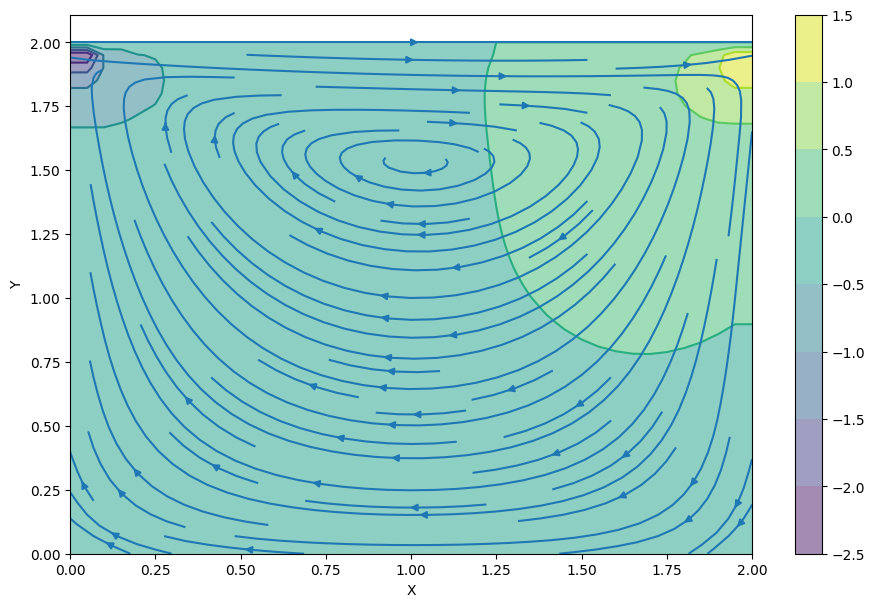

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from input_variables import SetupParameters
from grid import MeshGrid
from difference_equations import DiscretizationSchemes
from matrix_init import MatrixInitializer
from physics import *
from boundary_conditions import BCs
from visualization import *
from test import *

def main():
    params = SetupParameters(nx=41, ny=41, lx=2, ly=2, nt= 700, nppi=50, rho_fluid=1, nu=0.1, dt=0.001)
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    
    ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    p_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    for iteration in range (params.nt):
        ux_prev = ux_next.copy()
        uy_prev = uy_next.copy()
        p_prev = p_next.copy()
        
        dux_prev__dx = DiscretizationSchemes.backward_difference_x(ux_prev, params.dx)
        dux_prev__dy = DiscretizationSchemes.backward_difference_y(ux_prev, params.dx)
        duy_prev__dx = DiscretizationSchemes.backward_difference_x(uy_prev, params.dy)
        duy_prev__dy = DiscretizationSchemes.backward_difference_y(uy_prev, params.dy)
        
        laplace__ux_prev = DiscretizationSchemes.laplacian(ux_prev, params.dx, params.dy)
        laplace__uy_prev = DiscretizationSchemes.laplacian(uy_prev, params.dx, params.dy)
        
        ux_inter = HomogeneousAdvection.homogenous_advection_horizontal(ux_prev, uy_prev, dux_prev__dx, dux_prev__dy, 
                                                                       laplace__ux_prev, params.nu, params.dt)
        uy_inter = HomogeneousAdvection.homogenous_advection_vertical(ux_prev, uy_prev, duy_prev__dx, duy_prev__dy,
                                                                     laplace__uy_prev, params.nu, params.dt)
        
        ux_inter = BCs.velocity_BCx(ux_inter)
        uy_inter = BCs.velocity_BCy(uy_inter)
        
        dux_inter__dx = DiscretizationSchemes.backward_difference_x(ux_inter, params.dx)
        duy_inter__dy = DiscretizationSchemes.backward_difference_y(uy_inter, params.dy)
        
        b_i_j = PressurePoissonGaussSeidelSimple.source_term_pressure_poisson_gauss_seidel_simple(dux_inter__dx, duy_inter__dy,
                                                                          params.rho_fluid, params.dt)
        
        p_next = PressurePoissonGaussSeidelSimple.pressure_poisson_gauss_seidel_simple(p_prev, params.dx, b_i_j, params.nppi)
        dp_next__dx = DiscretizationSchemes.central_difference_x(p_next, params.dx)
        dp_next__dy = DiscretizationSchemes.central_difference_y(p_next, params.dy)
        
        ux_next = AdvectionVelocityCorrection.advection_velocity(ux_inter, dp_next__dx, 
                                                                 params.rho_fluid, params.dt,)
        uy_next = AdvectionVelocityCorrection.advection_velocity(uy_inter, dp_next__dy, 
                                                                 params.rho_fluid, params.dt,) 
        
        ux_next = BCs.velocity_BCx(ux_next)
        uy_next = BCs.velocity_BCy(uy_next)
        
        # ux_prev = ux_next
        # uy_prev = uy_next
        # p_prev = p_next
        
    # # Visualize results
    # Visual.visualize_vector_plot(X, Y, ux_inter, uy_inter, streamplot=True)
    # Visual.visualize_contour_plot(X, Y, ux_prev)
    # plt.show()
        
    # fig = plt.figure(figsize=(11,7), dpi=100)
    # # plotting the pressure field as a contour
    # plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)  
    # plt.colorbar()
    # # plotting the pressure field outlines
    # plt.contour(X, Y, p_next, cmap=cm.viridis)  
    # # plotting velocity field
    # plt.quiver(X[::2, ::2], Y[::2, ::2], ux_inter[::2, ::2], uy_inter[::2, ::2]) 
    # plt.xlabel('X')
    # plt.ylabel('Y')
    
    # fig = plt.figure(figsize=(11,7), dpi = 100)
    # ax = fig.add_subplot(111, projection='3d')
    # surf = ax.plot_surface(X, Y, p_next[:], rstride=1, cstride=1, cmap=cm.viridis,
    #             linewidth=0, antialiased=False)
    # ax.view_init(30, 225)
    # ax.set_xlabel('$x$')
    # ax.set_ylabel('$y$')
    
    fig = plt.figure(figsize=(11, 7), dpi=100)
    plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    plt.contour(X, Y, p_next, cmap=cm.viridis)
    plt.streamplot(X, Y, ux_inter, uy_inter)
    plt.xlabel('X')
    plt.ylabel('Y')
        
if __name__ == "__main__":
    main()

This is the method that the temperature can be added to it

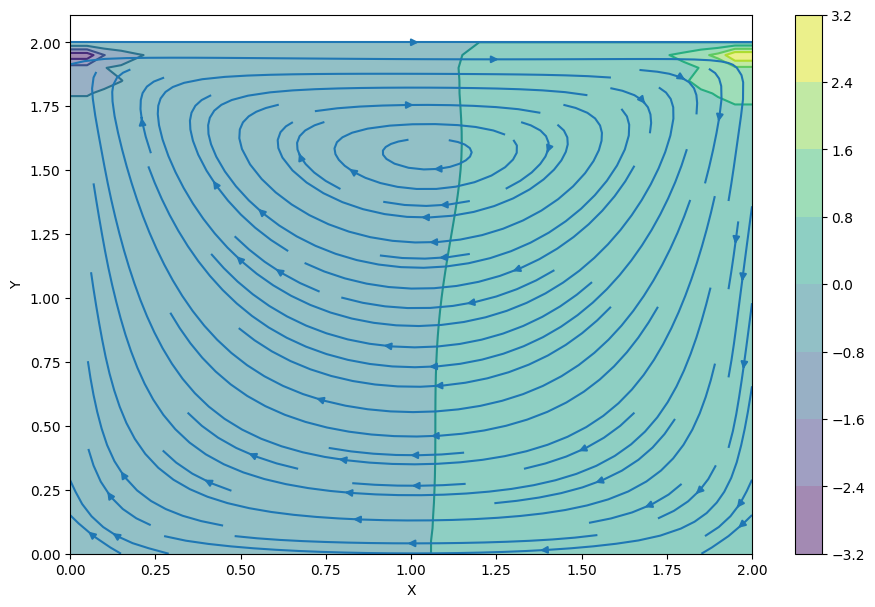

In [12]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from input_variables import SetupParameters
from grid import MeshGrid
from difference_equations import DiscretizationSchemes
from matrix_init import MatrixInitializer
from physics import *
from boundary_conditions import BCs
from visualization import *
from test import *

def main():
    params = SetupParameters(nx=41, ny=41, lx=2, ly=2, nt= 700, nppi=50, rho_fluid=1, nu=0.1, dt=0.001)
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    
    ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    p_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    for iteration in range (params.nt):
        ux_prev = ux_next.copy()
        uy_prev = uy_next.copy()
        p_prev = p_next.copy()
        
        dux_prev__dx = DiscretizationSchemes.backward_difference_x(ux_prev, params.dx)
        dux_prev__dy = DiscretizationSchemes.backward_difference_y(ux_prev, params.dx)
        duy_prev__dx = DiscretizationSchemes.backward_difference_x(uy_prev, params.dy)
        duy_prev__dy = DiscretizationSchemes.backward_difference_y(uy_prev, params.dy)
        
        laplace__ux_prev = DiscretizationSchemes.laplacian(ux_prev, params.dx, params.dy)
        laplace__uy_prev = DiscretizationSchemes.laplacian(uy_prev, params.dx, params.dy)
        
        ux_inter = HomogeneousAdvection.homogenous_advection_horizontal(ux_prev, uy_prev, dux_prev__dx, dux_prev__dy, 
                                                                       laplace__ux_prev, params.nu, params.dt)
        uy_inter = HomogeneousAdvection.homogenous_advection_vertical(ux_prev, uy_prev, duy_prev__dx, duy_prev__dy,
                                                                     laplace__uy_prev, params.nu, params.dt)
        
        ux_inter = BCs.velocity_BCx(ux_inter)
        uy_inter = BCs.velocity_BCy(uy_inter)
        
        dux_inter__dx = DiscretizationSchemes.backward_difference_x(ux_inter, params.dx)
        duy_inter__dy = DiscretizationSchemes.backward_difference_y(uy_inter, params.dy)
        
        b_i_j = PressurePoissonGaussSeidel.source_term_gauss_seidel(ux_inter, uy_inter,
                                                                params.dx, params.dy, params.dt)
        
        p_next = PressurePoissonGaussSeidel.pressure_poisson_gauss_seidel(p_prev, b_i_j, params.nppi,
                                                params.dx, params.dy)
        
        dp_next__dx = DiscretizationSchemes.central_difference_x(p_next, params.dx)
        dp_next__dy = DiscretizationSchemes.central_difference_y(p_next, params.dy)
        
        ux_next = AdvectionVelocityCorrection.velocity_correction_horizontal(ux_inter, dp_next__dx, 
                                                                 params.rho_fluid, params.dt)
        uy_next = AdvectionVelocityCorrection.velocity_correction_vertical(uy_inter, dp_next__dy, 
                                                                 params.rho_fluid, params.dt, buoyancy=False) 
        
        ux_next = BCs.velocity_BCx(ux_next)
        uy_next = BCs.velocity_BCy(uy_next)
        
        # ux_prev = ux_next
        # uy_prev = uy_next
        # p_prev = p_next
        
    # # Visualize results
    # Visual.visualize_vector_plot(X, Y, ux_inter, uy_inter, streamplot=True)
    # Visual.visualize_contour_plot(X, Y, ux_prev)
    # plt.show()
        
    # fig = plt.figure(figsize=(11,7), dpi=100)
    # # plotting the pressure field as a contour
    # plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)  
    # plt.colorbar()
    # # plotting the pressure field outlines
    # plt.contour(X, Y, p_next, cmap=cm.viridis)  
    # # plotting velocity field
    # plt.quiver(X[::2, ::2], Y[::2, ::2], ux_inter[::2, ::2], uy_inter[::2, ::2]) 
    # plt.xlabel('X')
    # plt.ylabel('Y')
    
    # fig = plt.figure(figsize=(11,7), dpi = 100)
    # ax = fig.add_subplot(111, projection='3d')
    # surf = ax.plot_surface(X, Y, p_next[:], rstride=1, cstride=1, cmap=cm.viridis,
    #             linewidth=0, antialiased=False)
    # ax.view_init(30, 225)
    # ax.set_xlabel('$x$')
    # ax.set_ylabel('$y$')
    
    fig = plt.figure(figsize=(11, 7), dpi=100)
    plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    plt.contour(X, Y, p_next, cmap=cm.viridis)
    plt.streamplot(X, Y, ux_inter, uy_inter)
    plt.xlabel('X')
    plt.ylabel('Y')
        
if __name__ == "__main__":
    main()

C:\Users\saeed\AppData\Local\Temp\ipykernel_23808\2666367413.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  Spin_up.append((np.mean(ux_next) - np.mean(ux_prev))/np.mean(ux_prev))


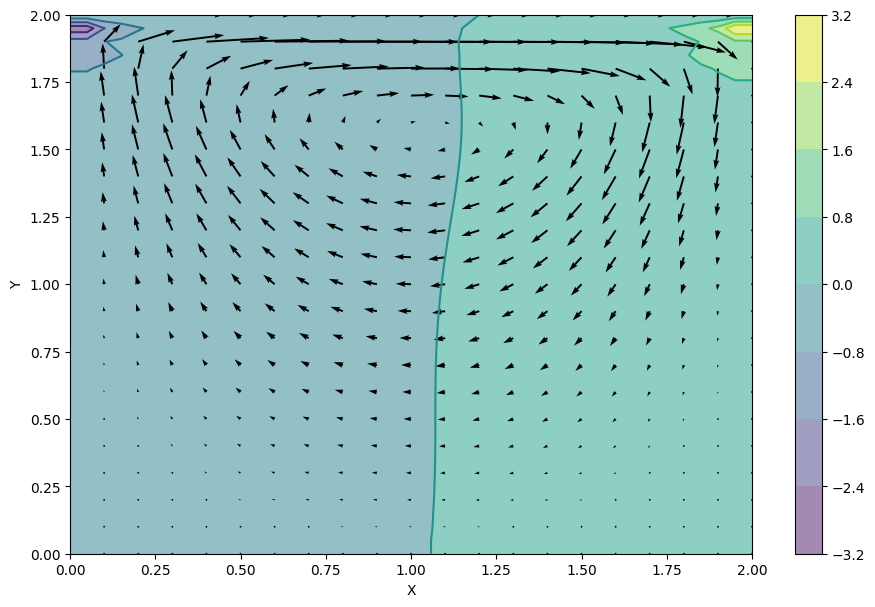

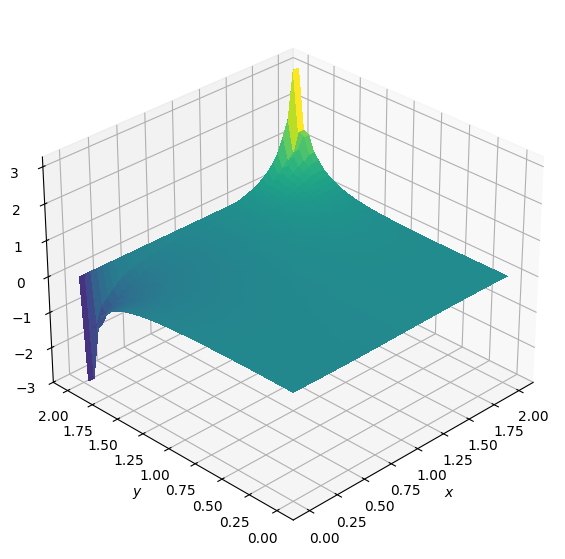

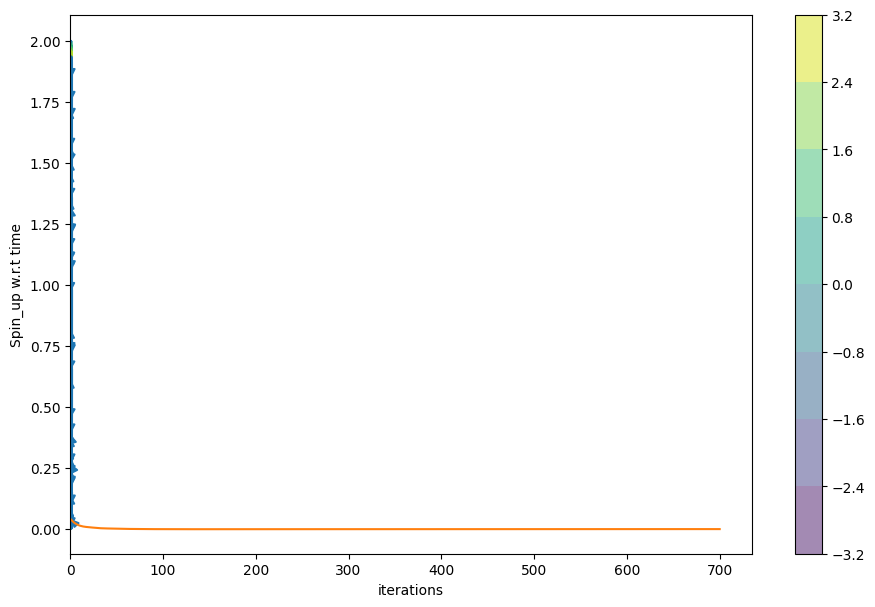

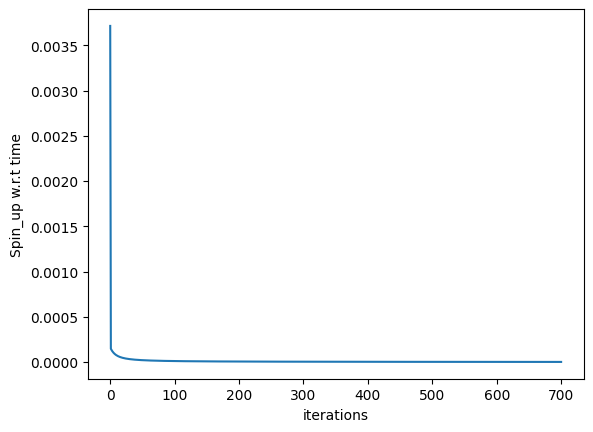

In [16]:

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from input_variables import SetupParameters
from grid import MeshGrid
from difference_equations import DiscretizationSchemes
from matrix_init import MatrixInitializer
from physics import *
from boundary_conditions import BCs
from visualization import *
from test import *

def main():
    params = SetupParameters(nx=41, ny=41, lx=2, ly=2, nt= 700, nppi=50, rho_fluid=1, nu=0.1, dt=0.001)
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    
    ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_inter = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    ux_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    p_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    Spin_up = []
    Error = []
    
    for iteration in range (params.nt):
        ux_prev = ux_next.copy()
        uy_prev = uy_next.copy()
        p_prev = p_next.copy()
        
        dux_prev__dx = DiscretizationSchemes.backward_difference_x(ux_prev, params.dx)
        dux_prev__dy = DiscretizationSchemes.backward_difference_y(ux_prev, params.dx)
        duy_prev__dx = DiscretizationSchemes.backward_difference_x(uy_prev, params.dy)
        duy_prev__dy = DiscretizationSchemes.backward_difference_y(uy_prev, params.dy)
        
        laplace__ux_prev = DiscretizationSchemes.laplacian(ux_prev, params.dx, params.dy)
        laplace__uy_prev = DiscretizationSchemes.laplacian(uy_prev, params.dx, params.dy)
        
        ux_inter = HomogeneousAdvection.homogenous_advection_horizontal(ux_prev, uy_prev, dux_prev__dx, dux_prev__dy, 
                                                                       laplace__ux_prev, params.nu, params.dt)
        uy_inter = HomogeneousAdvection.homogenous_advection_vertical(ux_prev, uy_prev, duy_prev__dx, duy_prev__dy,
                                                                     laplace__uy_prev, params.nu, params.dt)
        
        ux_inter = BCs.velocity_BCx(ux_inter)
        uy_inter = BCs.velocity_BCy(uy_inter)
        
        dux_inter__dx = DiscretizationSchemes.backward_difference_x(ux_inter, params.dx)
        duy_inter__dy = DiscretizationSchemes.backward_difference_y(uy_inter, params.dy)
        
        b_i_j = PressurePoissonGaussSeidel.source_term_gauss_seidel(ux_inter, uy_inter,
                                                                params.dx, params.dy, params.dt)
        
        p_next= PressurePoissonGaussSeidel.pressure_poisson_gauss_seidel(p_prev, b_i_j, params.nppi, params.dx,
        params.dy)
        
        dp_next__dx = DiscretizationSchemes.central_difference_x(p_next, params.dx)
        dp_next__dy = DiscretizationSchemes.central_difference_y(p_next, params.dy)
        
        ux_next = AdvectionVelocityCorrection.velocity_correction_horizontal(ux_inter, dp_next__dx, 
                                                                 params.rho_fluid, params.dt)
        uy_next = AdvectionVelocityCorrection.velocity_correction_vertical(uy_inter, dp_next__dy, 
                                                                 params.rho_fluid, params.dt, buoyancy=False) 
        
        ux_next = BCs.velocity_BCx(ux_next)
        uy_next = BCs.velocity_BCy(uy_next)
        
        Spin_up.append((np.mean(ux_next) - np.mean(ux_prev))/np.mean(ux_prev))
        Error.append((np.sqrt(np.sum((ux_next - ux_prev)**2))/ (params.nx * params.ny)))
        
        # ux_prev = ux_next
        # uy_prev = uy_next
        # p_prev = p_next
        
    # # Visualize results
    # Visual.visualize_vector_plot(X, Y, ux_inter, uy_inter, streamplot=True)
    # Visual.visualize_contour_plot(X, Y, ux_prev)
    # plt.show()
        
    fig = plt.figure(figsize=(11,7), dpi=100)
    # plotting the pressure field as a contour
    plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)  
    plt.colorbar()
    # plotting the pressure field outlines
    plt.contour(X, Y, p_next, cmap=cm.viridis)  
    # plotting velocity field
    plt.quiver(X[::2, ::2], Y[::2, ::2], ux_inter[::2, ::2], uy_inter[::2, ::2]) 
    plt.xlabel('X')
    plt.ylabel('Y')
    
    fig = plt.figure(figsize=(11,7), dpi = 100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, p_next[:], rstride=1, cstride=1, cmap=cm.viridis,
                linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    
    fig = plt.figure(figsize=(11, 7), dpi=100)
    plt.contourf(X, Y, p_next, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    plt.contour(X, Y, p_next, cmap=cm.viridis)
    plt.streamplot(X, Y, ux_inter, uy_inter)
    plt.xlabel('X')
    plt.ylabel('Y')
    
    Spin_up = np.array(Spin_up)
    np.shape(Spin_up)
        
    #plt.ylabel('Error')
    #plt.xlabel('Timesteps')
    plt.plot(np.linspace(0,params.nt,params.nt),Spin_up)
    plt.xlim()
    plt.ylim()
    plt.ylabel('Spin_up w.r.t time')
    plt.xlabel('iterations')
    plt.show()
    
    Error = np.array(Error)
    np.shape(Error)
        
    #plt.ylabel('Error')
    #plt.xlabel('Timesteps')
    plt.plot(np.linspace(0,params.nt,params.nt),Error)
    plt.xlim()
    plt.ylim()
    plt.ylabel('Spin_up w.r.t time')
    plt.xlabel('iterations')
    plt.show()
        
if __name__ == "__main__":
    main()

# Gauss-Seidel Method for Pressure Poisson Equation in Fluid Dynamics

## Gauss-Seidel Equation

The Gauss-Seidel method for solving a system of linear equations $Ax = b$ can be expressed as:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j<i} a_{ij}x_j^{(k+1)} - \sum_{j>i} a_{ij}x_j^{(k)}\right)$$

Where:
- $x_i^{(k+1)}$ is the i-th component of x at iteration k+1
- $a_{ij}$ are the elements of matrix A
- $b_i$ is the i-th component of vector b
- k is the iteration number

## Discretization for Pressure Poisson Equation

The pressure Poisson equation in its discrete form can be written as:

$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = b_{i,j}$$

Where $p$ is the pressure field and $b_{i,j}$ is the source term.

The discretized form using Gauss-Seidel is:

$$p_{i,j}^{(k+1)} = \frac{1}{4} \left(p_{i+1,j}^{(k)} + p_{i-1,j}^{(k+1)} + p_{i,j+1}^{(k)} + p_{i,j-1}^{(k+1)} - dx^2 b_{i,j}\right)$$

Where:
- $p_{i,j}^{(k+1)}$ is the updated pressure at grid point $(i,j)$ in the $(k+1)$-th iteration
- $p_{i+1,j}^{(k)}$, $p_{i,j+1}^{(k)}$ are the pressure values from the previous iteration
- $p_{i-1,j}^{(k+1)}$, $p_{i,j-1}^{(k+1)}$ are the most recently updated pressure values in the current iteration
- $dx$ is the grid spacing
- $b_{i,j}$ is the source term at grid point $(i,j)$

## Velocity Update

After solving the pressure Poisson equation, the velocity field is updated:

$$u_{i,j}^{n+1} = u_{i,j}^* - \frac{dt}{\rho} \frac{\partial p}{\partial x}$$
$$v_{i,j}^{n+1} = v_{i,j}^* - \frac{dt}{\rho} \frac{\partial p}{\partial y}$$

Where:
- $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$ are the updated velocity components
- $u_{i,j}^*$ and $v_{i,j}^*$ are the intermediate velocity components
- $dt$ is the time step
- $\rho$ is the fluid density
- $\frac{\partial p}{\partial x}$ and $\frac{\partial p}{\partial y}$ are the pressure gradients

The pressure gradients are typically approximated using central differences:

$$\frac{\partial p}{\partial x} \approx \frac{p_{i+1,j} - p_{i-1,j}}{2dx}$$
$$\frac{\partial p}{\partial y} \approx \frac{p_{i,j+1} - p_{i,j-1}}{2dy}$$


## Derivation of the Discretized Pressure Poisson Equation

### 1. Starting Point: The Pressure Poisson Equation

We begin with the pressure Poisson equation in 2D:

$$\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = b$$

Where $p$ is pressure and $b$ is a source term (often related to the divergence of the intermediate velocity field).

### 2. Finite Difference Approximation

We use central difference approximations for the second derivatives:

$$\frac{\partial^2 p}{\partial x^2} \approx \frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{(\Delta x)^2}$$

$$\frac{\partial^2 p}{\partial y^2} \approx \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{(\Delta y)^2}$$

Assuming $\Delta x = \Delta y = h$ for simplicity, we substitute these into the Poisson equation:

$$\frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{h^2} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{h^2} = b_{i,j}$$

### 3. Rearranging Terms

Multiply both sides by $h^2$:

$$(p_{i+1,j} - 2p_{i,j} + p_{i-1,j}) + (p_{i,j+1} - 2p_{i,j} + p_{i,j-1}) = h^2 b_{i,j}$$

Expand and collect $p_{i,j}$ terms:

$$p_{i+1,j} + p_{i-1,j} + p_{i,j+1} + p_{i,j-1} - 4p_{i,j} = h^2 b_{i,j}$$

### 4. Gauss-Seidel Iteration

In the Gauss-Seidel method, we solve for $p_{i,j}$ using the most recent values available. Let's denote the iteration number with superscript $(k)$:

$$p_{i,j}^{(k+1)} = \frac{1}{4}(p_{i+1,j}^{(k)} + p_{i-1,j}^{(k+1)} + p_{i,j+1}^{(k)} + p_{i,j-1}^{(k+1)} - h^2 b_{i,j})$$

This is the Gauss-Seidel iteration formula for the pressure Poisson equation.

### 5. Final Discretized Form

The final form, using $dx$ instead of $h$, is:

$$p_{i,j}^{(k+1)} = \frac{1}{4}(p_{i+1,j}^{(k)} + p_{i-1,j}^{(k+1)} + p_{i,j+1}^{(k)} + p_{i,j-1}^{(k+1)} - dx^2 b_{i,j})$$

This equation is used to iteratively update the pressure values in the Gauss-Seidel method.

Note:
- Superscript $(k)$ indicates values from the previous iteration.
- Superscript $(k+1)$ indicates the most recently updated values in the current iteration.
- The order of traversal through the grid affects which neighbors use updated values.

Another github repo

Cavity Flow in 2D using Finite Difference Method

Unsteady Term  : Forward Euler Scheme
Convection Term: Backward Difference Scheme
Diffusion Term : Central Difference Scheme

Velocity of Cavity Lid: 1 m/s
------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
------------------------------------------------
Iteration Completed!
------------------------------------------------
------------------------------------------------
Plotting Pressure Field
------------------------------------------------


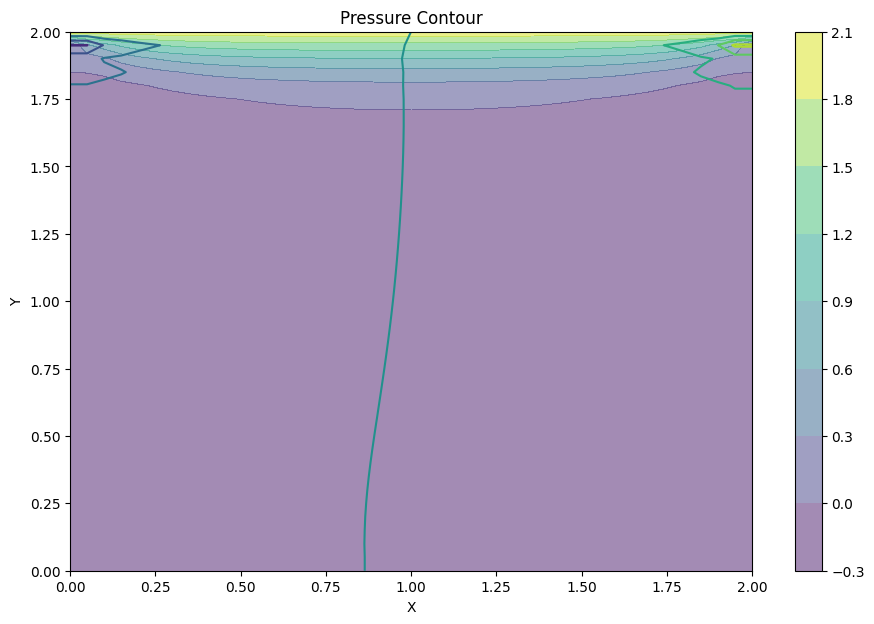

------------------------------------------------
Plotting Velocity Vectors
------------------------------------------------


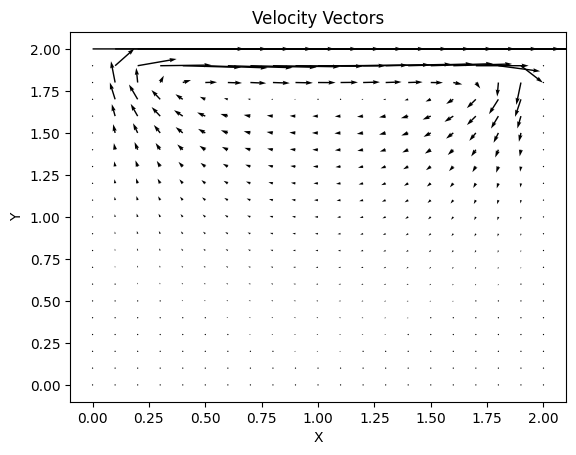

------------------------------------------------
Plotting Velocity Field
------------------------------------------------


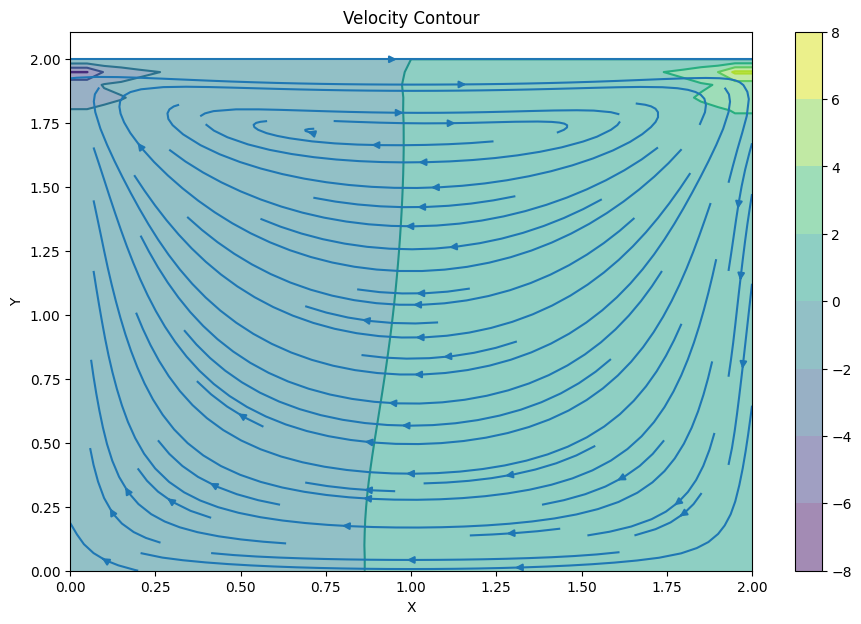

In [3]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

lineSingle = '------------------------------------------------'

print("Cavity Flow in 2D using Finite Difference Method\n")

print("Unsteady Term  : Forward Euler Scheme")
print("Convection Term: Backward Difference Scheme")
print("Diffusion Term : Central Difference Scheme\n")

print("Velocity of Cavity Lid: 1 m/s")

nx = 41            #Grid Points along X direction
ny = 41            #Grid Points along Y direction
iteration = 50

# iteration = input('Enter the number of Iterations to Solve: 50')          

# if iteration.isdigit() == False:
#     print("Please provide an integer\n")
# else:
#     iteration = int(iteration)


nt = 100     #Number of Time Step

#Grid Spacing

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

x  = numpy.linspace(0, 2, nx)        
y  = numpy.linspace(0, 2, ny)
X,Y = numpy.meshgrid(x, y)           #Generating a 2D Mesh

#fluid property

rho = 1                            #Density
nu  = 0.1                          #Viscosity

dt  = 0.001                        #time step size

#initilization

u = numpy.zeros((ny,nx))
v = numpy.zeros((ny,nx))
p = numpy.zeros((ny,nx))
b = numpy.zeros((ny,nx))

#Solving RHS of poisson eqution in a separate function

def build_up_p(b, rho, dt, u, v, dx, dy):

    b[1:-1,1:-1] = (rho *(1 / dt * ((u[1:-1,2:] - u[1:-1,0:-2]) / (2*dx) + (v[2:,1:-1] - v[:-2,1:-1]) / (2 * dy))
                          - ((u[1:-1,2:] - u[1:-1,0:-2]) / (2 * dx))**2 -
                             2 * ((u[2:,1:-1] - u[:-2,1:-1]) / (2 * dy) * (v[1:-1,2:] - v[1:-1,:-2]) / (2 * dx))
                          - ((v[2:,1:-1] - v[:-2,1:-1]) / (2 * dy))**2))

    return b

#Solving Poisson Equation for Pressure 

def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()

    for q in range(iteration):
        pn = p.copy()
        p[1:-1,1:-1] = (((pn[1:-1,2:]+pn[1:-1,:-2])*dy**2 + (pn[2:,1:-1]+pn[:-2,1:-1])*dx**2) /
                        (2*(dx**2 + dy**2)) - dx**2 * dy**2 /(2*(dx**2 + dy**2)) * b[1:-1,1:-1])

        #Boundary Condition

        p[:,-1] = p[:,-2]   #dp/dx = 0 at x = 2
        p[0,:]  = p[1,:]    #dp/dy = 0 at y = 0
        p[:,0]  = p[:,1]    #dp/dx = 0 at x = 0
        p[-1,:] = 0         #p = 0 at y = 0  pressure outlet, atmospheric presure

    return p


def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b  = numpy.zeros((ny,nx))

    for n in range(nt):
        un = u.copy()
        vn = v.copy()

        b = build_up_p(b, rho, dt, u, v, dx, dy)

        #Calling the Pressure Field
        
        p = pressure_poisson(p, dx, dy, b)

        #Solving X Momentum

        u[1:-1,1:-1] = (un[1:-1,1:-1]-
                        un[1:-1,1:-1] * dt / dx *
                        (un[1:-1,1:-1] - un[1:-1,:-2])-
                        vn[1:-1,1:-1] * dt / dy *
                        (un[1:-1,1:-1] - un[:-2,1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1,2:] - p[1:-1,:-2]) +
                        nu * (dt / dx**2 *
                        (un[1:-1,2:] - 2 * un[1:-1,1:-1] + un[1:-1,:-2]) +
                            dt / dy**2 *
                            (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[:-2,1:-1])))

        #Solving Y Momentum
        
        v[1:-1,1:-1] = (vn[1:-1,1:-1]-
                        un[1:-1,1:-1] * dt / dx *
                        (vn[1:-1,1:-1] - vn[1:-1,:-2]) -
                        vn[1:-1,1:-1] * dt / dy *
                        (vn[1:-1,1:-1] - vn[:-2,1:-1]) -
                        dt / (2 * rho * dy) * (p[2:,1:-1] - p[:-2,1:-1]) +
                        nu * (dt / dx**2 *
                        (vn[1:-1,2:] - 2 * vn[1:-1,1:-1] + vn[1:-1,:-2]) +
                        dt / dy**2 *
                        (vn[2:,1:-1] - 2 * vn[1:-1,1:-1] + vn[:-2,1:-1])))

        #Boundary Condition

        u[0,:]  = 0
        u[:,0]  = 0
        u[:,-1] = 0
        u[-1,:] = 2       #at cavity lid velocity is 1
        v[0,:]  = 0
        v[-1,:] = 0
        v[:,0]  = 0
        v[:,-1] = 0

    return u, v, p

print(lineSingle)
print("Calculating Numerical Solution......")
print(lineSingle)

u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

print(lineSingle)
print("Iteration Completed!")
print(lineSingle)


fig = pyplot.figure(figsize=(11,7),dpi=100)

#plotting pressure contour

print(lineSingle)
print("Plotting Pressure Field")
print(lineSingle)

pyplot.contourf(X,Y,u, alpha=0.5,cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.title('Pressure Contour')
pyplot.show()

#plotting vector field

print(lineSingle)
print("Plotting Velocity Vectors")
print(lineSingle)

pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.title('Velocity Vectors')
pyplot.show()

#plotting velocity contour

print(lineSingle)
print("Plotting Velocity Field")
print(lineSingle)

fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.title('Velocity Contour')
pyplot.show()